In [1]:
import bike as bike
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date']
)

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


## Finding the Customer_Age's mean

In [4]:
sales['Customer_Age'].mean()

35.91921157861212

<AxesSubplot:ylabel='Density'>

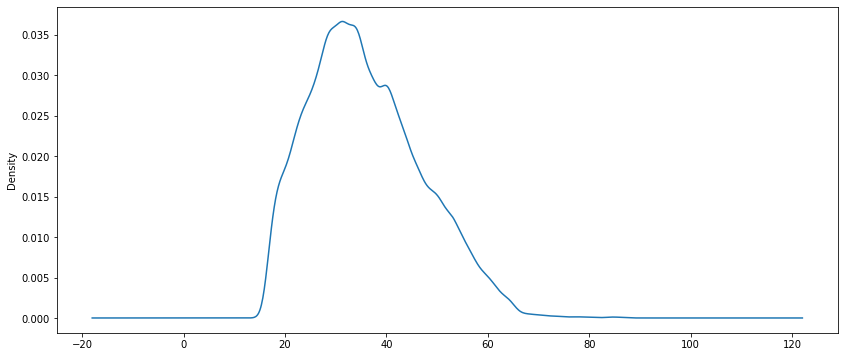

In [6]:
sales['Customer_Age'].plot(kind='density', figsize=(14, 6))

<AxesSubplot:>

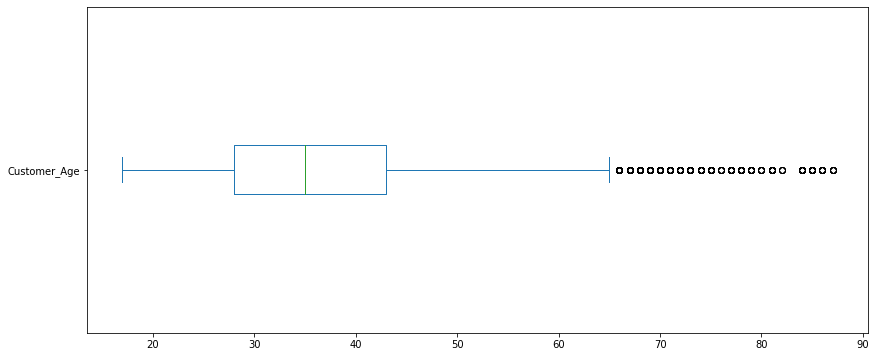

In [8]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14, 6))

## Finding the Order_Quantity's mean

In [9]:
sales['Order_Quantity'].mean()

11.901659648253654

<AxesSubplot:ylabel='Frequency'>

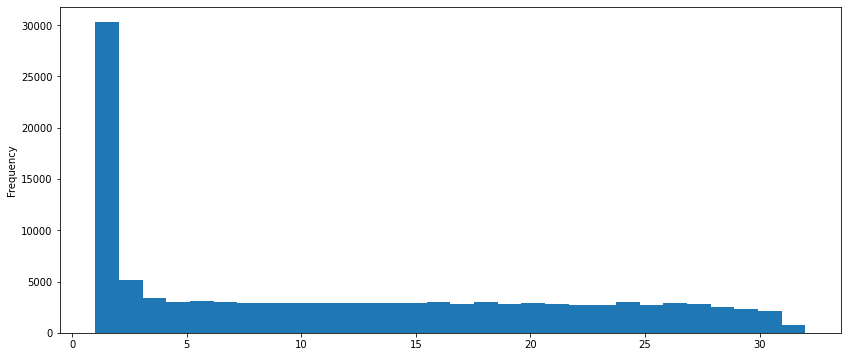

In [10]:
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14, 6))

<AxesSubplot:>

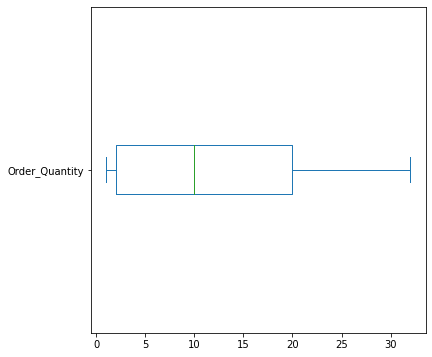

In [11]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(6, 6))

## Finding sales per year

In [14]:
sales['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<AxesSubplot:ylabel='Year'>

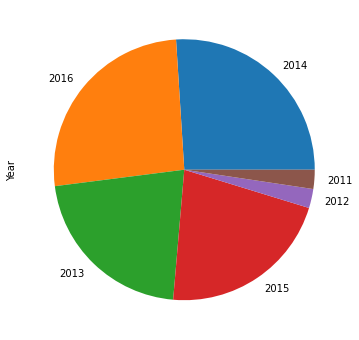

In [15]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6, 6))

## Finding sales per month

In [16]:
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

<AxesSubplot:>

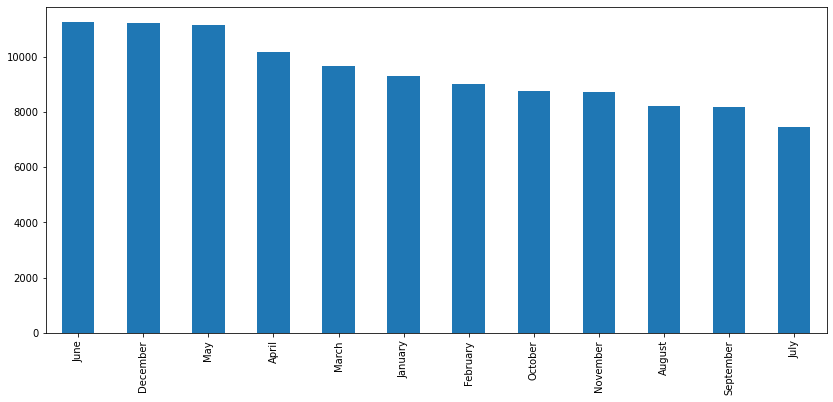

In [17]:
sales['Month'].value_counts().plot(kind='bar', figsize=(14, 6))

## Country with the most sales

In [18]:
sales['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

<AxesSubplot:>

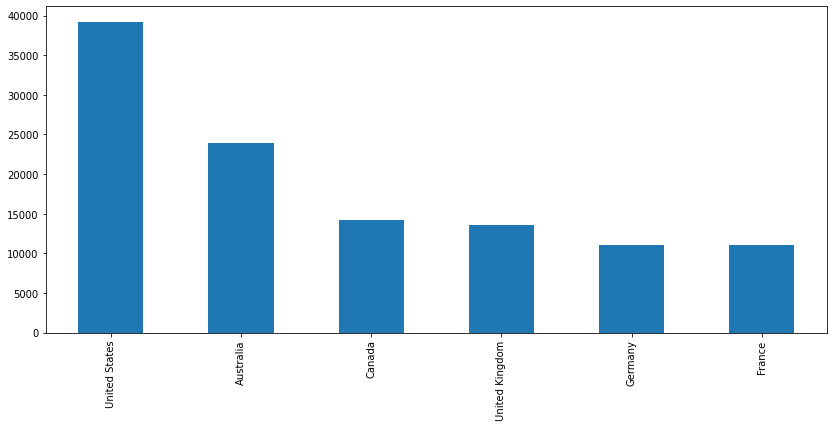

In [19]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14, 6))

## List of every product sold

In [20]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

<AxesSubplot:>

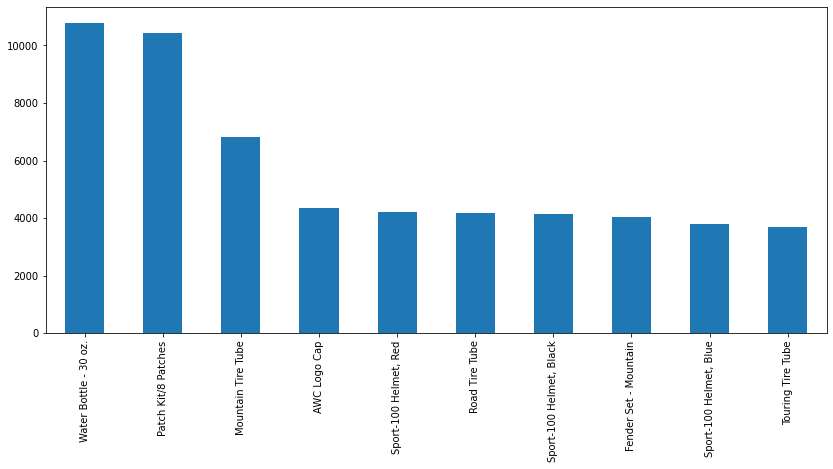

In [23]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14, 6))

## Relationship between Unit_Cost and Unit_Price

<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

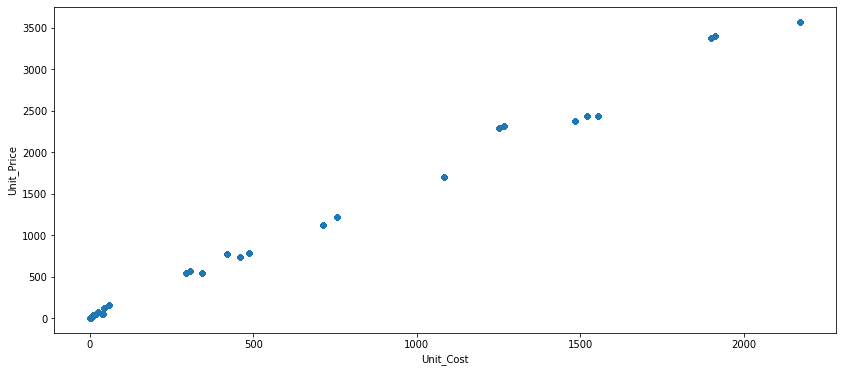

In [24]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(14, 6))

## Relationship between Order_Quantity and Profit

<AxesSubplot:xlabel='Order_Quantity', ylabel='Profit'>

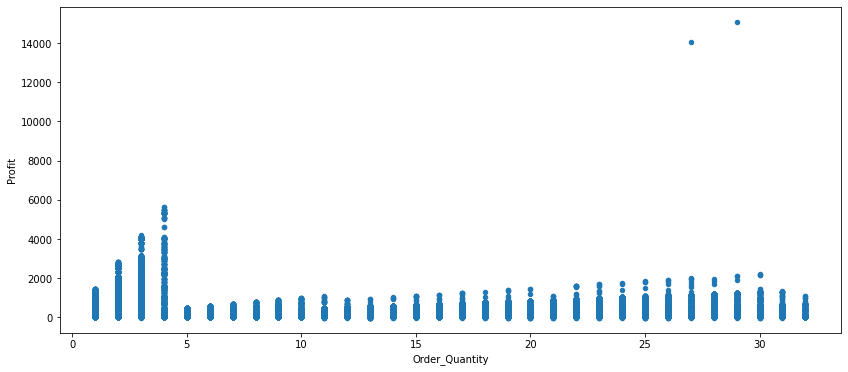

In [25]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(14, 6))

## Relationship between Profit per Country

<AxesSubplot:title={'center':'Profit'}, xlabel='[Country]'>

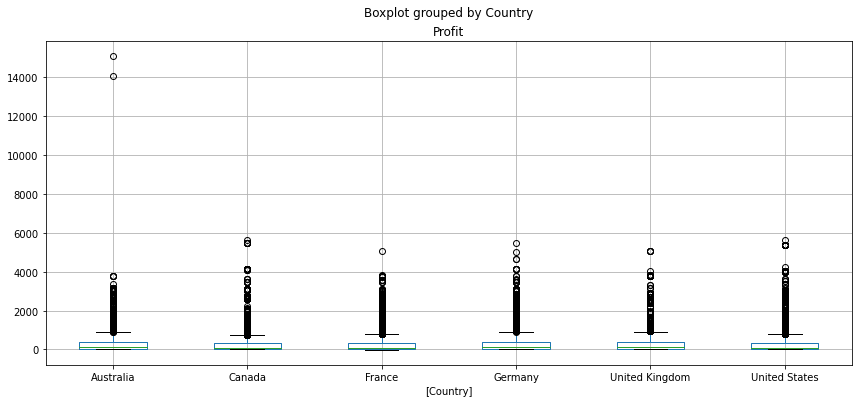

In [26]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(14, 6))

## Relationship between Customer_Age per Country

<AxesSubplot:title={'center':'Customer_Age'}, xlabel='[Country]'>

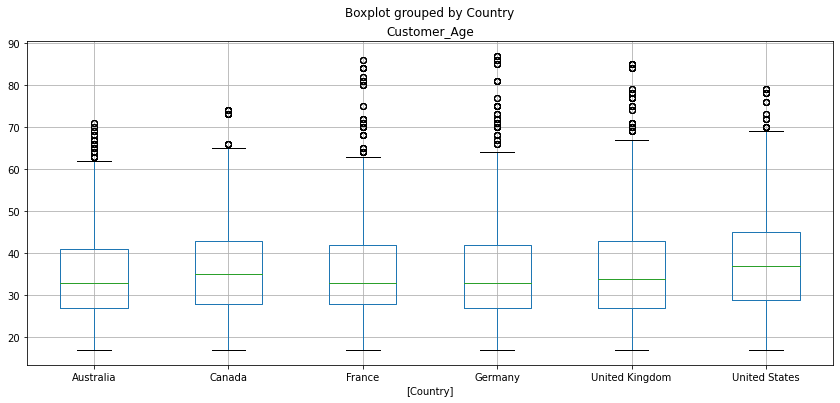

In [27]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(14, 6))

## Calculate new Calculated_Date column

In [29]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

## Parse Calculated_Date column into datetime object

In [33]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

## Sales through years

<AxesSubplot:>

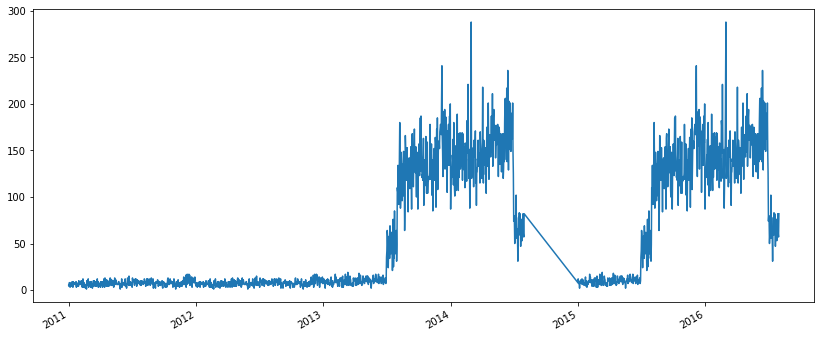

In [34]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14, 6))

## Increase US $50 revenue to every sale

In [35]:
sales['Revenue'] += 50

## How many orders made in Canada or France

In [37]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

## How many Bike Racks orders were made from Canada

In [38]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104

## How many orders were made in each region of France

In [40]:
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()
france_states

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

<AxesSubplot:>

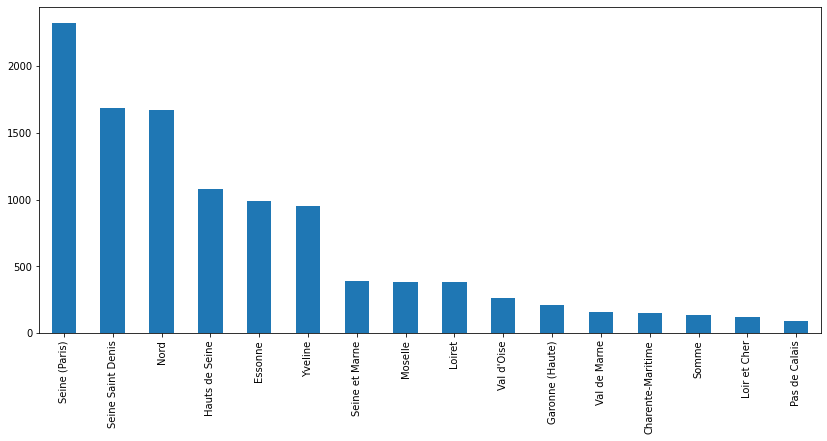

In [41]:
france_states.plot(kind='bar', figsize=(14, 6))

## Sales per category

In [42]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<AxesSubplot:ylabel='Product_Category'>

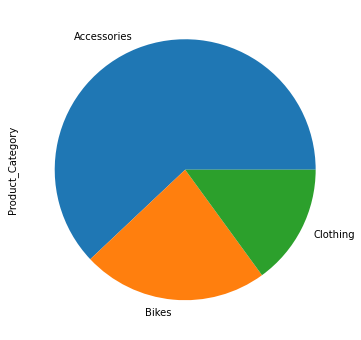

In [43]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(14, 6))

## How many orders were made per accessory sub-categories

In [45]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()
accessories

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

<AxesSubplot:>

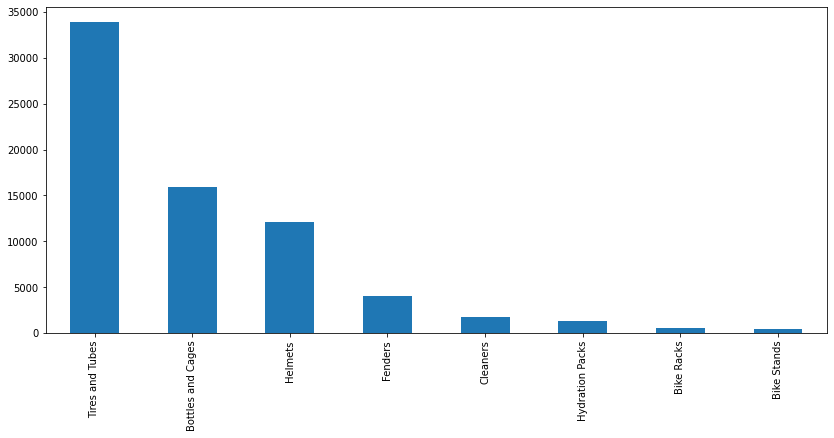

In [46]:
accessories.plot(kind='bar', figsize=(14, 6))

## How many orders were made per bike sub-categories

In [47]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()
bikes

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

<AxesSubplot:ylabel='Sub_Category'>

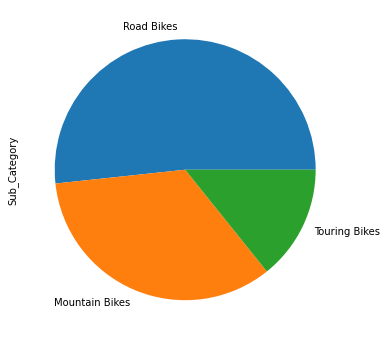

In [48]:
bikes.plot(kind='pie', figsize=(14, 6))

## Which gender has the most amount of sales?

In [49]:
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

<AxesSubplot:>

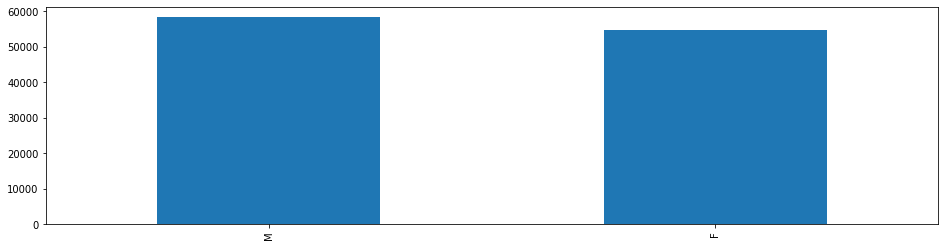

In [50]:
sales['Customer_Gender'].value_counts().plot(kind='bar', figsize=(16, 4))

## How many sales with more than 500 in Revenue were made by men?

In [51]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)].shape[0]

50

## Top 5 sales with the highest revenue

In [52]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54119,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14362,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-09-30


## Sale with the highest revenue

In [53]:
highest = sales['Revenue'] == sales['Revenue'].max()
sales.loc[highest]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24


## The mean of Order_Quantity of orders with more than 10K in revenue

In [54]:
floor = sales['Revenue'] > 10_000
sales.loc[floor, 'Order_Quantity'].mean()

3.689265536723164

## The mean of Order_Quantity of orders with less than 10K in revenue

In [55]:
ceiling = sales['Revenue'] < 10_000
sales.loc[ceiling, 'Order_Quantity'].mean()

11.914539380997528

## How many orders were made in May of 2016

In [56]:
condition = (sales['Year'] == 2016) & (sales['Month'] == 'May')

sales.loc[condition].shape[0]

5015

## How many orders were made between May and July of 2016

In [58]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))
sales.loc[cond]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,572,2016-05-15
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,240,2016-05-22
21,2016-05-17,17,May,2016,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2016-05-17
33,2016-05-23,23,May,2016,47,Adults (35-64),F,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1697,1035,2782,2016-05-23
69,2016-06-19,19,June,2016,35,Adults (35-64),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,12,45,120,886,540,1476,2016-06-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112985,2016-05-05,5,May,2016,25,Young Adults (25-34),M,Australia,New South Wales,Clothing,Vests,"Classic Vest, L",14,24,64,444,336,830,2016-05-05
113001,2016-07-27,27,July,2016,34,Young Adults (25-34),M,France,Essonne,Clothing,Vests,"Classic Vest, M",7,24,64,262,168,480,2016-07-27
113003,2016-05-23,23,May,2016,20,Youth (<25),F,United Kingdom,England,Clothing,Vests,"Classic Vest, M",15,24,64,562,360,972,2016-05-23
113005,2016-05-03,3,May,2016,21,Youth (<25),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,234,2016-05-03


<AxesSubplot:title={'center':'Profit'}, xlabel='[Month]'>

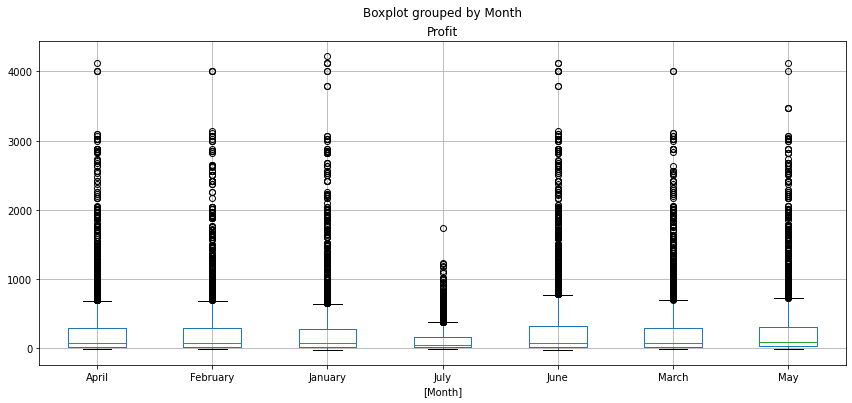

In [59]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]
profit_2016.boxplot(by='Month', figsize=(14, 6))

## Add 7.2% Tax on every sale Unit_Price within US

In [60]:
cond = sales['Country'] == 'United States'
sales.loc[cond, 'Unit_Price'] *= 1.072